In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [35]:
img = cv2.imread('sample_data/kohli_1.jpg')
img.shape # 3rd dimension is RGB

(168, 300, 3)

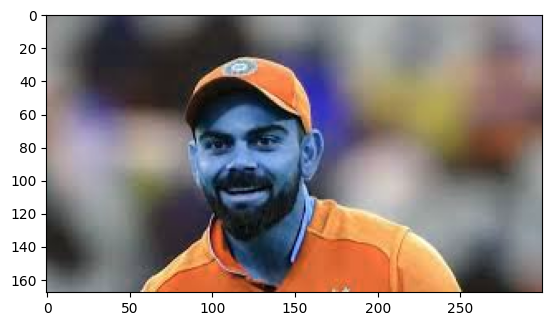

In [36]:
plt.imshow(img)

In [37]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(168, 300)

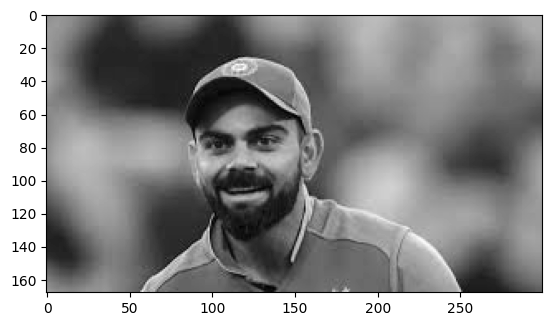

In [38]:
plt.imshow(gray_img, cmap='gray')

In [39]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces

array([[86, 53, 66, 66]], dtype=int32)

In [40]:
x, y, w, h = faces[0]
x, y, w, h

(86, 53, 66, 66)

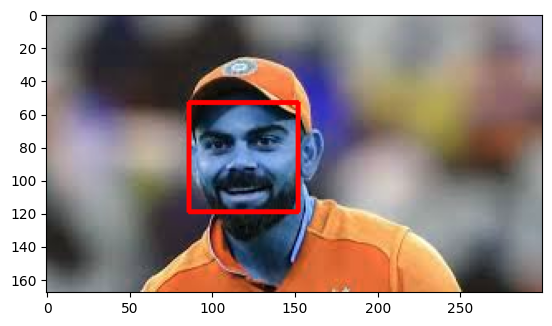

In [41]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

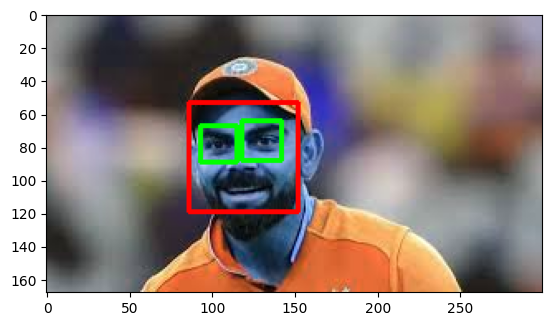

In [42]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2) # for face
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2) # for eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

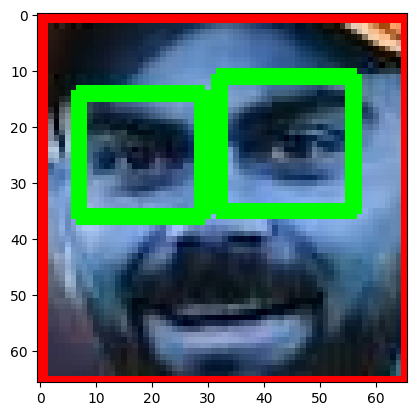

In [43]:
plt.imshow(roi_color, cmap='gray') # cropped version of face and eyes

In [44]:
cropped_img = np.array(roi_color)
cropped_img.shape

(66, 66, 3)

In [45]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

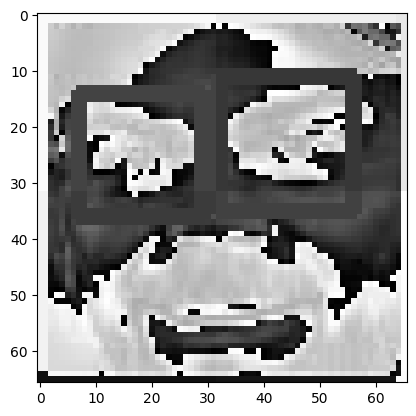

In [46]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [47]:
def get_cropped_image_if_2_eyes(image_path):
  img = cv2.imread(image_path)
  if img is None:
      return None
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return roi_color

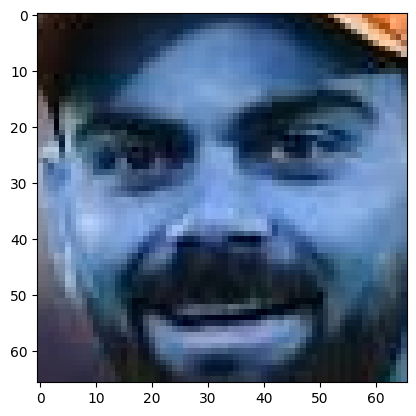

In [48]:
obstructed_image = get_cropped_image_if_2_eyes('sample_data/kohli_1.jpg')
plt.imshow(obstructed_image)

In [49]:
# obstructed_image = get_cropped_image_if_2_eyes('sample_data/kohli_2.jpg') # covered eyes in the image
# plt.imshow(obstructed_image)

In [50]:
# obstructed_image = get_cropped_image_if_2_eyes('sample_data/sharapova_2.jpg')
# plt.imshow(obstructed_image)

In [51]:
path_to_data = 'sample_data/'
path_to_cr = 'sample_data/cropped/'

In [52]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [53]:
img_dirs

['sample_data/lionel_messi',
 'sample_data/cropped',
 'sample_data/.ipynb_checkpoints',
 'sample_data/virat_kohli']

In [54]:
import shutil
if os.path.exists(path_to_cr):
  shutil.rmtree(path_to_cr)
os.mkdir(path_to_cr)

In [55]:
# Store cropped faces of celebrities
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
  if img_dir == 'sample_data/cropped' or img_dir == 'sample_data/.ipynb_checkpoints':
    continue
  count = 1
  celebrity_name = img_dir.split('/')[-1]
  print(celebrity_name)
  celebrity_file_names_dict[celebrity_name] = []

  for entry in os.scandir(img_dir):
    roi_color = get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr + celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder: ", cropped_folder)

      cropped_file_name = celebrity_name + str(count) + ".png"
      cropped_file_path = cropped_folder + "/" + cropped_file_name
      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_dict[cropped_file_path] = celebrity_name
      count += 1

lionel_messi
Generating cropped images in folder:  sample_data/cropped/lionel_messi
virat_kohli
Generating cropped images in folder:  sample_data/cropped/virat_kohli


In [56]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['sample_data/cropped/lionel_messi/lionel_messi38.png',
  'sample_data/cropped/lionel_messi/lionel_messi39.png',
  'sample_data/cropped/lionel_messi/lionel_messi12.png',
  'sample_data/cropped/lionel_messi/lionel_messi4.png',
  'sample_data/cropped/lionel_messi/lionel_messi35.png',
  'sample_data/cropped/lionel_messi/lionel_messi11.png',
  'sample_data/cropped/lionel_messi/lionel_messi27.png',
  'sample_data/cropped/lionel_messi/lionel_messi2.png',
  'sample_data/cropped/lionel_messi/lionel_messi3.png',
  'sample_data/cropped/lionel_messi/lionel_messi20.png',
  'sample_data/cropped/lionel_messi/lionel_messi33.png',
  'sample_data/cropped/lionel_messi/lionel_messi10.png',
  'sample_data/cropped/lionel_messi/lionel_messi9.png',
  'sample_data/cropped/lionel_messi/lionel_messi7.png',
  'sample_data/cropped/lionel_messi/lionel_messi23.png',
  'sample_data/cropped/lionel_messi/lionel_messi25.png',
  'sample_data/cropped/lionel_messi/lionel_messi28.png',
  'sample_data/cropp

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0, 'virat_kohli': 1}

In [58]:
x = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    if img is None:
      continue
    scaled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img, 'db1', 5) # wavelength tranformed image
    scaled_img_har = cv2.resize(img_har, (32, 32))
    combined_image = np.vstack([scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)]) # vertically stack the cropped image and the walength transformed image
    x.append(combined_image)
    y.append(class_dict[celebrity_name])

In [59]:
len(x[0]) # 32*32*3 (l,b,rgb) + 32*32 (for wavelength transformed image)

4096

In [60]:
x[0].shape

(4096, 1)

In [61]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape # 48 images each having 4096 data points

(87, 4096)

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8636363636363636

In [64]:
len(x_test)

22

In [65]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22



In [66]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [68]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.938462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.861538,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.938462,{'logisticregression__C': 1}


In [69]:
best_clf = best_estimators['svm']

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[8, 3],
       [3, 8]])

Text(95.72222222222221, 0.5, 'Truth')

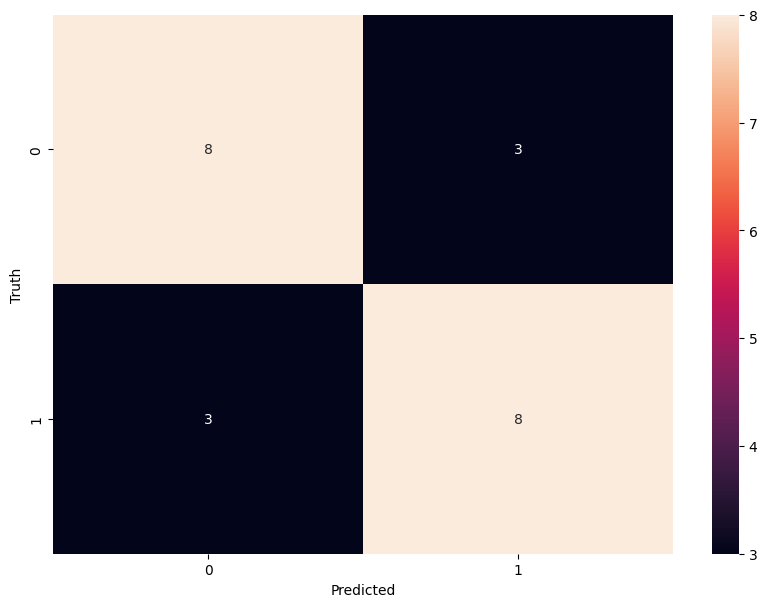

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')